<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,50.559148,81.904568,79.961837,37.315190,7725.570319,7985.311062,-418.000097,8403.311158
1,0.0,1.0,50.770029,59.077518,64.393028,64.302026,3855.014564,4103.557165,185.931746,3917.625419
2,0.0,2.0,63.581158,67.427434,32.002308,52.332133,6364.172464,6589.515497,280.890409,6308.625088
3,0.0,3.0,88.560742,20.809763,79.512827,53.166412,-311.661212,-59.611468,336.644987,-396.256455
4,0.0,4.0,60.413661,23.684278,34.086676,73.200888,610.343421,811.728925,785.684771,26.044154
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.686674,31.123393,65.693722,41.850934,-1012.900569,-791.545846,22.238049,-813.783895
249996,999.0,246.0,38.599956,51.098242,78.426770,85.790052,221.803962,485.718983,190.333227,295.385756
249997,999.0,247.0,93.418644,75.091147,93.791634,64.706862,-7655.657071,-7318.648784,-1428.703374,-5889.945410
249998,999.0,248.0,88.254919,37.155021,76.641003,44.885097,991.393446,1248.329486,-481.047320,1729.376807


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    50.559148  81.904568  79.961837  37.315190  7725.570319   
      1.0    50.770029  59.077518  64.393028  64.302026  3855.014564   
      2.0    63.581158  67.427434  32.002308  52.332133  6364.172464   
      3.0    88.560742  20.809763  79.512827  53.166412  -311.661212   
      4.0    60.413661  23.684278  34.086676  73.200888   610.343421   
...                ...        ...        ...        ...          ...   
999.0 245.0  72.686674  31.123393  65.693722  41.850934 -1012.900569   
      246.0  38.599956  51.098242  78.426770  85.790052   221.803962   
      247.0  93.418644  75.091147  93.791634  64.706862 -7655.657071   
      248.0  88.254919  37.155021  76.641003  44.885097   991.393446   
      249.0  76.193548  76.536366  70.876620  48.212410 -4647.395444   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    7985.311062  -418.000097  8403.311158  
      1.0    4103.557165   185.931746  3917.625419  
      2.0    6589.515497   280.890409  6308.625088  
      3.0     -59.611468   336.644987  -396.256455  
      4.0     811.728925   785.684771    26.044154  
...                  ...          ...          ...  
999.0 245.0  -791.545846    22.238049  -813.783895  
      246.0   485.718983   190.333227   295.385756  
      247.0 -7318.648784 -1428.703374 -5889.945410  
      248.0  1248.329486  -481.047320  1729.376807  
      249.0 -4365.576500  -919.554462 -3446.022037  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    50.559148  81.904568  79.961837  37.315190  7725.570319   
      1.0    50.770029  59.077518  64.393028  64.302026  3855.014564   
      2.0    63.581158  67.427434  32.002308  52.332133  6364.172464   
      3.0    88.560742  20.809763  79.512827  53.166412  -311.661212   
      4.0    60.413661  23.684278  34.086676  73.200888   610.343421   
...                ...        ...        ...        ...          ...   
999.0 245.0  72.686674  31.123393  65.693722  41.850934 -1012.900569   
      246.0  38.599956  51.098242  78.426770  85.790052   221.803962   
      247.0  93.418644  75.091147  93.791634  64.706862 -7655.657071   
      248.0  88.254919  37.155021  76.641003  44.885097   991.393446   
      249.0  76.193548  76.536366  70.876620  48.212410 -4647.395444   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    7985.311062  -418.000097  8403.311158  
      1.0    4103.557165   185.931746  3917.625419  
      2.0    6589.515497   280.890409  6308.625088  
      3.0     -59.611468   336.644987  -396.256455  
      4.0     811.728925   785.684771    26.044154  
...                  ...          ...          ...  
999.0 245.0  -791.545846    22.238049  -813.783895  
      246.0   485.718983   190.333227   295.385756  
      247.0 -7318.648784 -1428.703374 -5889.945410  
      248.0  1248.329486  -481.047320  1729.376807  
      249.0 -4365.576500  -919.554462 -3446.022037  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,50.559148,81.904568,79.961837,37.315190,7725.570319,7985.311062,-418.000097,8403.311158
1,0.0,1.0,50.770029,59.077518,64.393028,64.302026,3855.014564,4103.557165,185.931746,3917.625419
2,0.0,2.0,63.581158,67.427434,32.002308,52.332133,6364.172464,6589.515497,280.890409,6308.625088
3,0.0,3.0,88.560742,20.809763,79.512827,53.166412,-311.661212,-59.611468,336.644987,-396.256455
4,0.0,4.0,60.413661,23.684278,34.086676,73.200888,610.343421,811.728925,785.684771,26.044154
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.686674,31.123393,65.693722,41.850934,-1012.900569,-791.545846,22.238049,-813.783895
249996,999.0,246.0,38.599956,51.098242,78.426770,85.790052,221.803962,485.718983,190.333227,295.385756
249997,999.0,247.0,93.418644,75.091147,93.791634,64.706862,-7655.657071,-7318.648784,-1428.703374,-5889.945410
249998,999.0,248.0,88.254919,37.155021,76.641003,44.885097,991.393446,1248.329486,-481.047320,1729.376807


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    50.559148  81.904568  79.961837  37.315190  7725.570319   
      1.0    50.770029  59.077518  64.393028  64.302026  3855.014564   
      2.0    63.581158  67.427434  32.002308  52.332133  6364.172464   
      3.0    88.560742  20.809763  79.512827  53.166412  -311.661212   
      4.0    60.413661  23.684278  34.086676  73.200888   610.343421   
...                ...        ...        ...        ...          ...   
999.0 245.0  72.686674  31.123393  65.693722  41.850934 -1012.900569   
      246.0  38.599956  51.098242  78.426770  85.790052   221.803962   
      247.0  93.418644  75.091147  93.791634  64.706862 -7655.657071   
      248.0  88.254919  37.155021  76.641003  44.885097   991.393446   
      249.0  76.193548  76.536366  70.876620  48.212410 -4647.395444   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    7985.311062  -418.000097  8403.311158  
      1.0    4103.557165   185.931746  3917.625419  
      2.0    6589.515497   280.890409  6308.625088  
      3.0     -59.611468   336.644987  -396.256455  
      4.0     811.728925   785.684771    26.044154  
...                  ...          ...          ...  
999.0 245.0  -791.545846    22.238049  -813.783895  
      246.0   485.718983   190.333227   295.385756  
      247.0 -7318.648784 -1428.703374 -5889.945410  
      248.0  1248.329486  -481.047320  1729.376807  
      249.0 -4365.576500  -919.554462 -3446.022037  

[250000 rows x 8 columns]

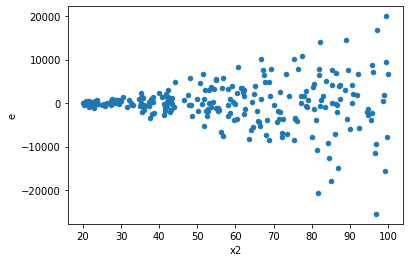

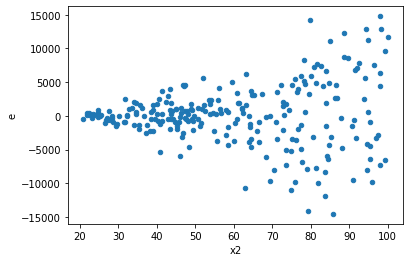

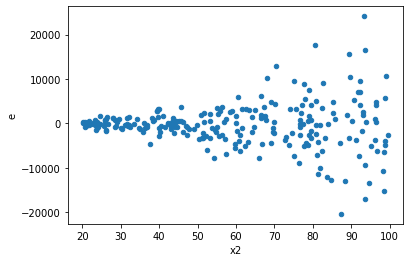

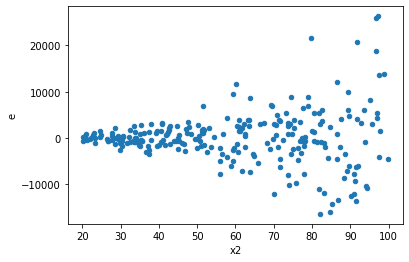

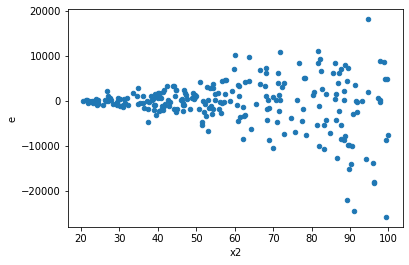

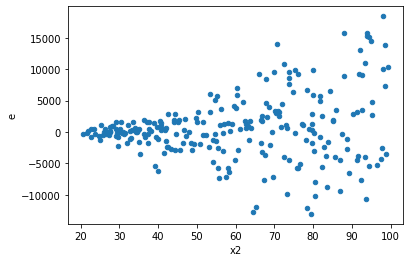

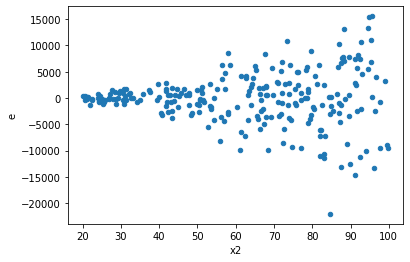

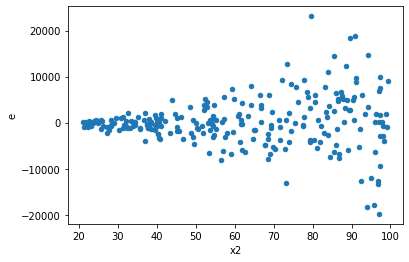

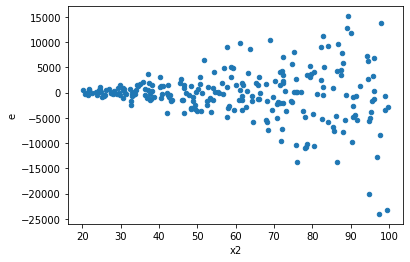

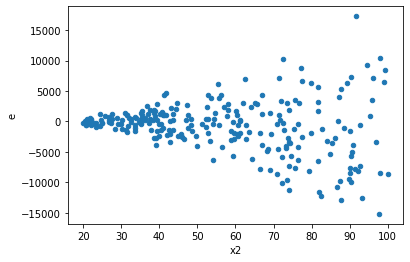

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,127.0,115.0,2925433967.0345855,3680231062.436694,23034913.126256578,32002009.238579948,1.3892828274703644,0.07337233755416217,0.9633138312229189,0.036686168777081085,Reject005=1 : Homoscedasticity
1.0,133.0,109.0,1296912722.9280348,3904437113.012142,9751223.480661916,35820523.97258846,3.6734389324196837,1.5756951299294997e-11,0.9999999999921215,7.878475649647498e-12,Reject005=0 : Heteroscedasticity
3.0,118.0,124.0,1758055802.5539837,6011334692.380532,14898777.987745624,48478505.58371397,3.2538578414678017,2.452216207871061e-10,0.9999999998773892,1.2261081039355304e-10,Reject005=0 : Heteroscedasticity
6.0,117.0,125.0,2734635266.4632053,3403447285.3842297,23372950.99541201,27227578.28307384,1.164918297583325,0.40107999819019446,0.7994600009049028,0.20053999909509723,Reject005=1 : Homoscedasticity
7.0,113.0,129.0,1092830903.2415295,5938605886.9286995,9671069.940190526,46035704.54983488,4.760145964669546,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,128.0,114.0,1133865523.2703133,4833906331.063138,8858324.400549322,42402687.11458893,4.786761603803926,6.661338147750939e-16,0.9999999999999997,3.3306690738754696e-16,Reject005=0 : Heteroscedasticity
9.0,125.0,117.0,412135538.5855574,3996217194.846092,3297084.3086844594,34155702.52005207,10.359365828191464,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
11.0,136.0,106.0,3241971250.438007,3739798024.506572,23838023.900279462,35281113.438741244,1.4800351567030534,0.035370064630413145,0.9823149676847934,0.017685032315206572,Reject005=0 : Heteroscedasticity
13.0,123.0,119.0,1946236070.3150966,2945672992.5820017,15823057.482236559,24753554.55951262,1.564397689087694,0.014616139034903108,0.9926919304825484,0.007308069517451554,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,127.0,115.0,2925433967.0345855,3680231062.436694,23034913.126256578,32002009.238579948,1.3892828274703644,0.07337233755416217,Reject005=1 : Homoscedasticity
1.0,133.0,109.0,1296912722.9280348,3904437113.012142,9751223.480661916,35820523.97258846,3.6734389324196837,1.5756951299294997e-11,Reject005=0 : Heteroscedasticity
2.0,134.0,108.0,4157209649.6637473,1981209218.1575336,31023952.60943095,18344529.79775494,0.5913021473665608,0.00392244412113301,Reject005=0 : Heteroscedasticity
3.0,118.0,124.0,1758055802.5539837,6011334692.380532,14898777.987745624,48478505.58371397,3.2538578414678017,2.452216207871061e-10,Reject005=0 : Heteroscedasticity
4.0,115.0,127.0,5081425883.746396,1046039778.7954232,44186312.03257736,8236533.691302544,0.1864046423523641,5.903584595261537e-18,Reject005=0 : Heteroscedasticity
5.0,123.0,119.0,4681865872.4677,1192907241.001609,38063950.18266423,10024430.596652178,0.2633576007888347,1.2462196102299146e-12,Reject005=0 : Heteroscedasticity
6.0,117.0,125.0,2734635266.4632053,3403447285.3842297,23372950.99541201,27227578.28307384,1.164918297583325,0.40107999819019446,Reject005=1 : Homoscedasticity
7.0,113.0,129.0,1092830903.2415295,5938605886.9286995,9671069.940190526,46035704.54983488,4.760145964669546,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,128.0,114.0,1133865523.2703133,4833906331.063138,8858324.400549322,42402687.11458893,4.786761603803926,6.661338147750939e-16,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    725
Reject005=1 : Homoscedasticity      275
Name: Result_test, dtype: int64